http://smrmkt.hatenablog.jp/entry/2016/02/21/163507

In [1]:
library(glmnet)

Warning message:
"package 'glmnet' was built under R version 4.0.2"
Loading required package: Matrix

Loaded glmnet 4.0-2



In [4]:
library(caret)

Warning message:
"package 'caret' was built under R version 4.0.2"
Loading required package: lattice

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.0.2"


In [5]:
library(psych)

Warning message:
"package 'psych' was built under R version 4.0.2"

Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha




In [6]:
data(cars)

In [7]:
t(head(cars))

,1,2,3,4,5,6
Price,22661.05,21725.01,29142.71,30731.94,33358.77,30315.17
Mileage,20105.00,13457.00,31655.00,22479.00,17590.00,23635.00
Cylinder,6.00,6.00,4.00,4.00,4.00,4.00
Doors,4.00,2.00,2.00,2.00,2.00,2.00
Cruise,1.00,1.00,1.00,1.00,1.00,1.00
Sound,0.00,1.00,1.00,0.00,1.00,0.00
Leather,0.00,0.00,1.00,0.00,1.00,0.00
Buick,1.00,0.00,0.00,0.00,0.00,0.00
Cadillac,0.00,0.00,0.00,0.00,0.00,0.00
Chevy,0.00,1.00,0.00,0.00,0.00,0.00


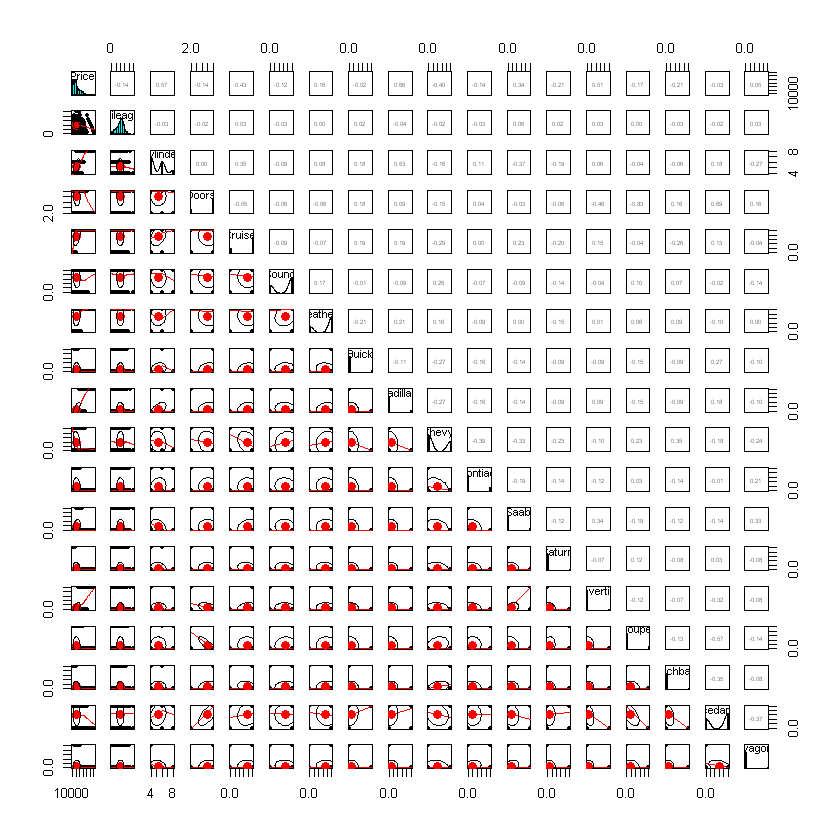

In [31]:
pairs.panels(cars)

In [34]:
fit.lm <- glm(Price ~ ., data = cars)

In [35]:
summary(fit.lm)


Call:
glm(formula = Price ~ ., data = cars)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-9513.5  -1540.9    125.4   1470.3  13619.7  

Coefficients: (3 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.124e+03  9.926e+02  -1.133  0.25773    
Mileage     -1.842e-01  1.256e-02 -14.664  < 2e-16 ***
Cylinder     3.659e+03  1.133e+02  32.286  < 2e-16 ***
Doors        1.567e+03  2.589e+02   6.052  2.2e-09 ***
Cruise       3.409e+02  2.960e+02   1.152  0.24978    
Sound        4.409e+02  2.345e+02   1.880  0.06043 .  
Leather      7.908e+02  2.497e+02   3.167  0.00160 ** 
Buick        9.477e+02  5.525e+02   1.715  0.08670 .  
Cadillac     1.336e+04  6.248e+02  21.386  < 2e-16 ***
Chevy       -5.492e+02  4.397e+02  -1.249  0.21203    
Pontiac     -1.400e+03  4.868e+02  -2.875  0.00414 ** 
Saab         1.228e+04  5.546e+02  22.139  < 2e-16 ***
Saturn              NA         NA      NA       NA    
convertible  1.

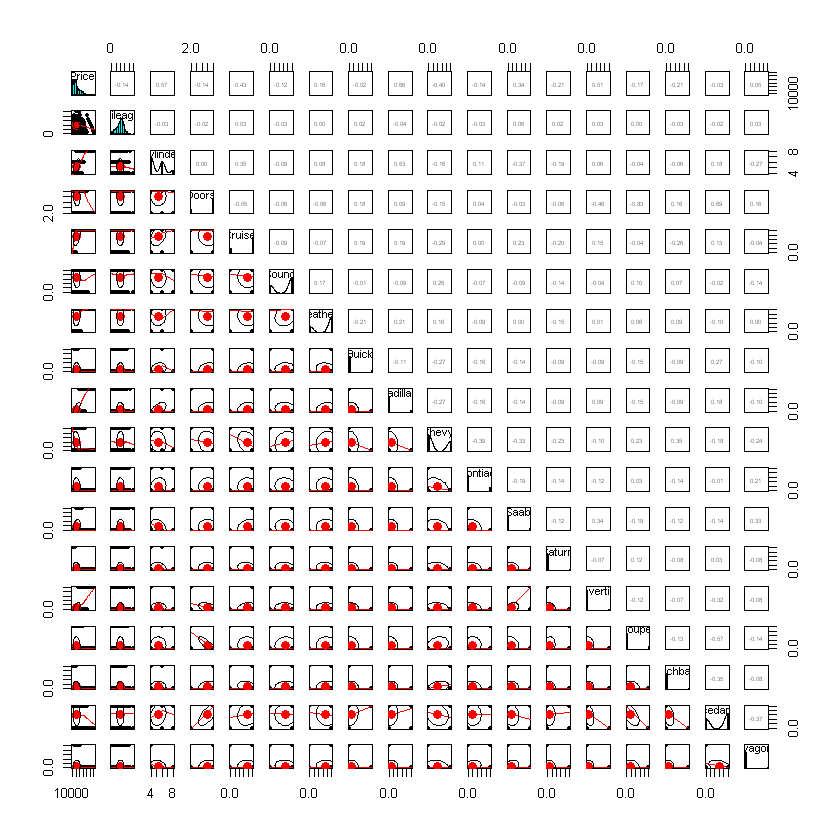

In [36]:
pairs.panels(cars)

In [37]:
fit.glmnet.lasso <- glmnet(as.matrix(cars[, -1]),
                           as.matrix(cars[, 1]),
                            alpha = 1)

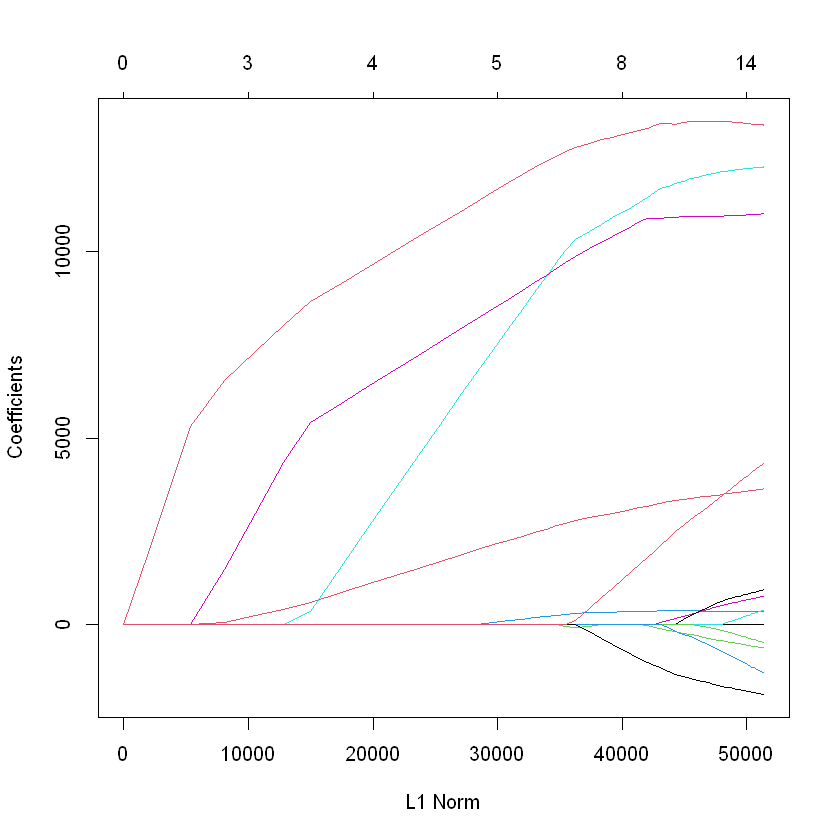

In [38]:
plot(fit.glmnet.lasso)

In [39]:
fit.glmnet.lasso.cv <- cv.glmnet(as.matrix(cars[, -1]),
                                 as.matrix(cars[, 1]),
                                  nfold = 5,
                                  alpha = 1)

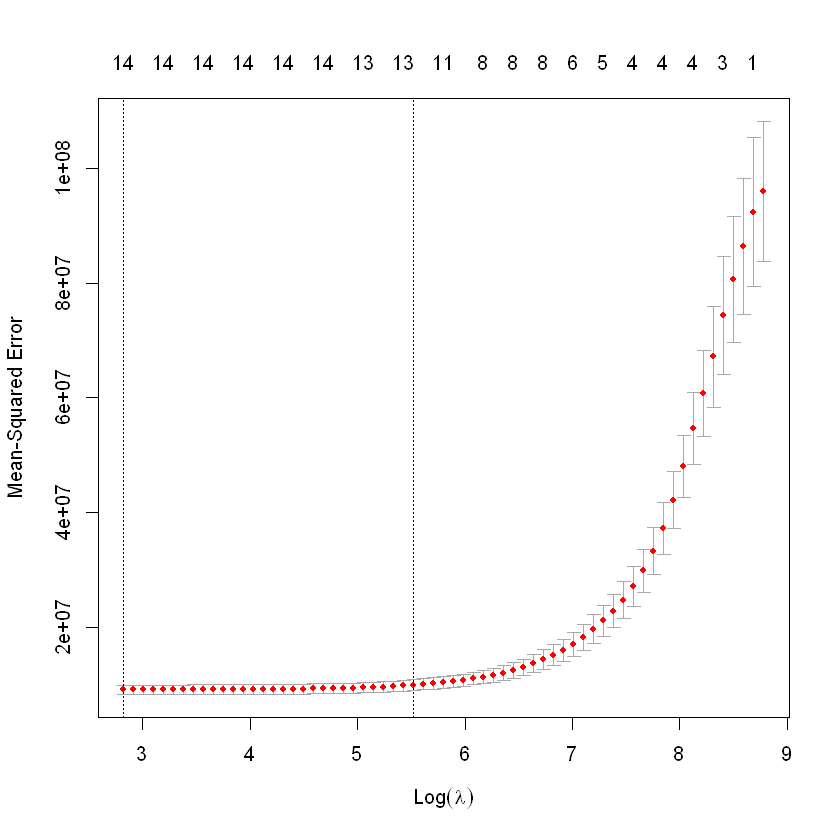

In [40]:
plot(fit.glmnet.lasso.cv)

In [41]:
fit.glmnet.lasso.cv$lambda.min

[1] 16.90139

In [42]:
fit.glmnet.lasso.cv$lambda.1se

[1] 250.9802

In [43]:
coef(fit.glmnet.lasso.cv, s = fit.glmnet.lasso.cv$lambda.min)

18 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)  3331.7858800
Mileage        -0.1818766
Cylinder     3636.7109816
Doors        -631.4904974
Cruise        340.5460071
Sound         387.1736169
Leather       756.9417863
Buick         928.2740497
Cadillac    13399.6038149
Chevy        -487.6230681
Pontiac     -1302.5800360
Saab        12275.1021808
Saturn          .        
convertible 11016.5702170
coupe           .        
hatchback   -1884.5001088
sedan           .        
wagon        4328.7502745

以下Ridge

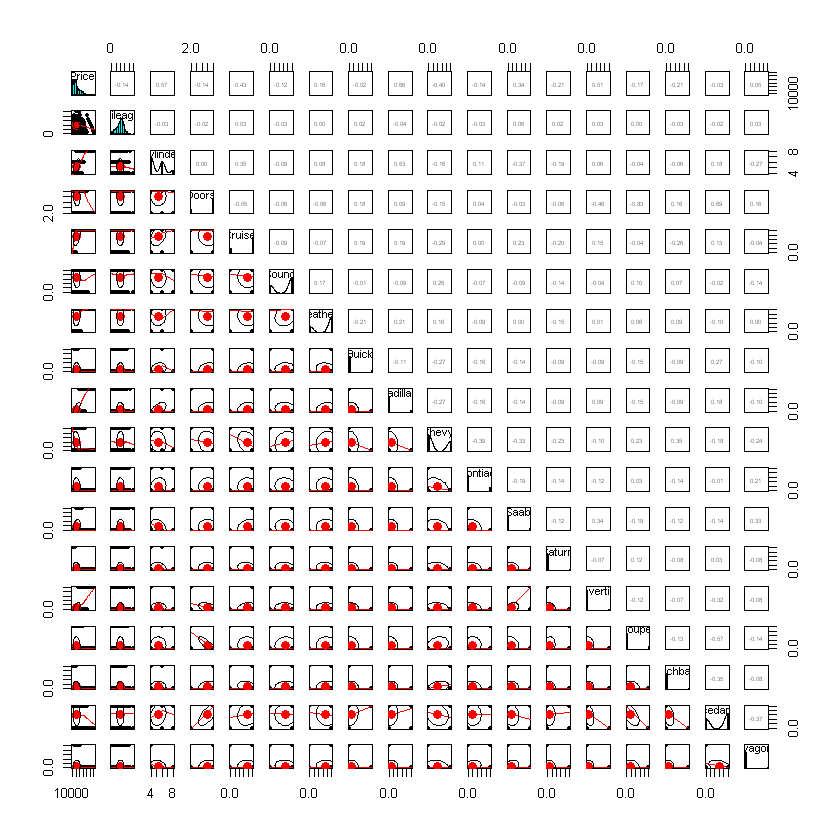

In [44]:
pairs.panels(cars)

In [47]:
fit.glmnet.ridge <- glmnet(as.matrix(cars[, -1]),
                           as.matrix(cars[, 1]),
                            alpha = 0)

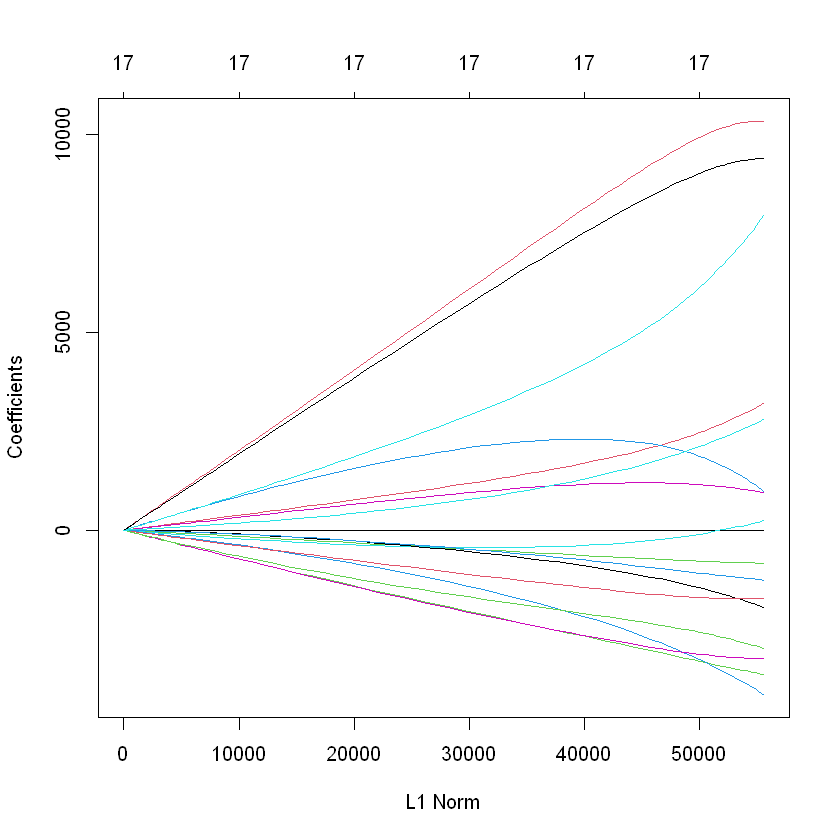

In [48]:
plot(fit.glmnet.ridge)

In [49]:
fit.glmnet.ridge.cv <- cv.glmnet(as.matrix(cars[, -1]),
                                 as.matrix(cars[, 1]),
                                  nfold = 5,
                                  alpha = 0)

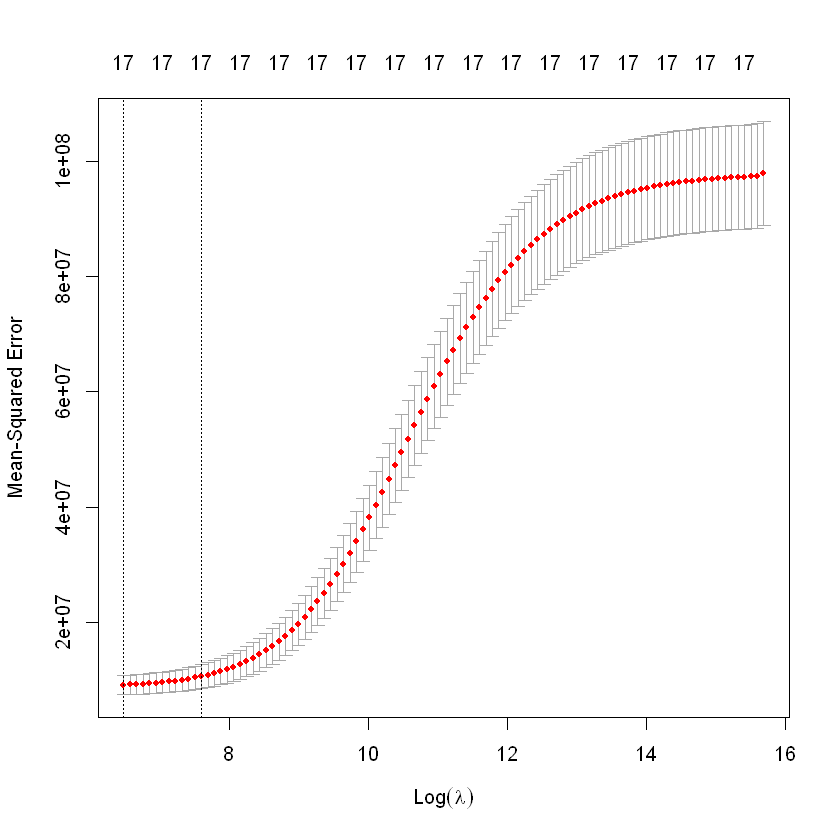

In [50]:
plot(fit.glmnet.ridge.cv)

In [51]:
fit.glmnet.ridge.cv$lambda.1se

[1] 1988.975

In [52]:
coef(fit.glmnet.ridge.cv, s = fit.glmnet.ridge.cv$lambda.min)

18 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept) 10214.8611499
Mileage        -0.1722991
Cylinder     3205.5980370
Doors        -833.0847470
Cruise        978.5187517
Sound         240.7823982
Leather       945.0867046
Buick       -1961.0109272
Cadillac    10317.7567584
Chevy       -3641.5106588
Pontiac     -4150.1655607
Saab         7956.2140547
Saturn      -3240.2145236
convertible  9387.0514200
coupe       -1727.9462576
hatchback   -2981.2392923
sedan       -1256.6873690
wagon        2789.2814379